### Sample code 1. for extrapolation

[0 1 2 3 4 5] [ 30  50  80 160 300 580]
[[ 2.15703925e+00  2.10907789e-02 -4.80942833e+00]
 [ 2.10907789e-02  2.08142160e-04 -4.55365148e-02]
 [-4.80942833e+00 -4.55365148e-02  1.38318226e+01]]


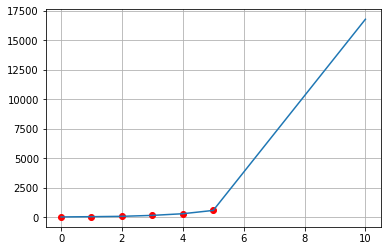

In [19]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

def exponential_fit(x, a, b, c):
    return a*np.exp(-b*x) + c

if __name__ == "__main__":
    x = np.array([0, 1, 2, 3, 4, 5])
    y = np.array([30, 50, 80, 160, 300, 580])
    print(x,y)
    fitting_parameters, covariance = curve_fit(exponential_fit, x, y)
    a, b, c = fitting_parameters
    #print(a,b,c)
    print(covariance)
    next_x = 10
    next_y = exponential_fit(next_x, a, b, c)

    plt.plot(y,'ro')
    plt.plot(np.append(x,next_x),np.append(y, next_y))
    plt.grid()
    plt.show()

### Sample code 2. for extrapolation

##### I have used this code for COVID data analysis

In [20]:
from scipy.interpolate import interp1d
from scipy import arange, array, exp

def extrap1d(interpolator):
    xs = interpolator.x
    ys = interpolator.y

    def pointwise(x):
        if x < xs[0]:
            return ys[0]+(x-xs[0])*(ys[1]-ys[0])/(xs[1]-xs[0])
        elif x > xs[-1]:
            return ys[-1]+(x-xs[-1])*(ys[-1]-ys[-2])/(xs[-1]-xs[-2])
        else:
            return interpolator(x)

    def ufunclike(xs):
        return array(list(map(pointwise, array(xs))))

    return ufunclike


x = arange(0,10)
y = exp(-x/3.0)
f_i = interp1d(x, y)
f_x = extrap1d(f_i)

print (f_x([9]))
print (f_x([9,10]))

[0.04978707]
[0.04978707 0.03009069]


/usr/lib/python3/dist-packages/ipykernel_launcher.py:22: DeprecationWarning: scipy.arange is deprecated and will be removed in SciPy 2.0.0, use numpy.arange instead
/usr/lib/python3/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: scipy.exp is deprecated and will be removed in SciPy 2.0.0, use numpy.exp instead
/usr/lib/python3/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead


# Final code for Extrapolation study

@email: mrahaman@scholar.buruniv.ac.in

The confirmed case data is collected from 
<br>https://en.m.wikipedia.org/wiki/2020_coronavirus_pandemic_in_India
<br>Here the active cases recorded from 02nd March 2020 where the active case was 5. After that all the data are collected each day, and the plot bellow consists of day in time ascending order which starts from 2nd March2020.

check the number of rows in 'data' file
use 'wc data' command in terminal


enter the number of rows you have from gov data 45
enter the number of next days you want to plot data 10


/usr/lib/python3/dist-packages/ipykernel_launcher.py:19: DeprecationWarning: scipy.array is deprecated and will be removed in SciPy 2.0.0, use numpy.array instead


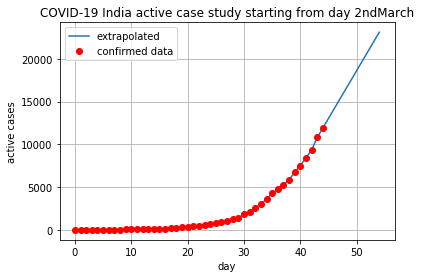

In [22]:
import numpy as np
from scipy.interpolate import interp1d
from scipy import arange, array, exp
import matplotlib.pyplot as plt

def extrap1d(interpolator):
    xs = interpolator.x
    ys = interpolator.y

    def pointwise(x):
        if x < xs[0]:
            return ys[0]+(x-xs[0])*(ys[1]-ys[0])/(xs[1]-xs[0])
        elif x > xs[-1]:
            return ys[-1]+(x-xs[-1])*(ys[-1]-ys[-2])/(xs[-1]-xs[-2])
        else:
            return interpolator(x)

    def ufunclike(xs):
        return array(list(map(pointwise, array(xs))))

    return ufunclike

print("check the number of rows in 'data' file")
print("use 'wc data' command in terminal")
dataday = input("enter the number of rows you have from gov data")
nxtN = input("enter the number of next days you want to plot data")
dataday = int(dataday)
nxtN = int(nxtN)
nxtdy = np.arange(nxtN)
nxtdata = np.zeros(nxtN)

dt = np.loadtxt("data")
dy = np.arange(dataday)
np.savetxt("datafull.txt",np.vstack((dy,dt)).T)
data = np.loadtxt("datafull.txt")
day = data[:,0]
case = data[:,1]

f_i = interp1d(day, case)
f_x = extrap1d(f_i)

for i in nxtdy:
    nxtdata[i] = f_x([dataday+i])
    
fcase = np.append(case,nxtdata)
fday = np.arange(dataday + nxtN)

plt.plot(fday,fcase, label = 'extrapolated')
plt.plot(day,case,'ro', label = 'confirmed data')
plt.grid()
plt.xlabel("day")
plt.ylabel("active cases")
plt.title("COVID-19 India active case study starting from day 2ndMarch")
plt.legend()
plt.savefig("covid-19india_tendency_from02032020.jpeg",dpi=500)
plt.show()